<a href="https://colab.research.google.com/github/Leo-Vincenzi/PUC-MVP_2/blob/main/MVP2_Machine_Learning_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/MVP2_PUC_Logo.jpg" width="950"/>

# MVP Sprint 2: Machine Learning & Analytics
---
## Professora: Tatiana Escovedo
## Aluno: Leonardo Braga De Vincenzi
### Título: Teste de modelos de *Machine Learning* para detecção de fraudes de cartão de crédito
##### (Abril/2024)
---

## 1 Definição do Problema
---
**Relevância**

A fraude em cartões de crédito é um problema global que causa enorme prejuízo. De acordo com o relatório *Card Fraud Losses Worldwide*, publicação comercial que cobre a indústria global de cartões de pagamento, perdas causadas por fraudes em cartões de crédito em todo o mundo chegarão a marca de **49** bilhões de dólares até **2030**. No Brasil, duas em cada dez pessoas já tiveram seus cartões de crédito fraudados.

Nesse viés, o advento do *Big Data* e a evolução de modelos mais robustos de *Machine Learning* permitiu o desenvolvimento de ferramentas que passaram a detectar e prevenir essas fraudes de maneira mais ágil e eficaz.

**Qual o objetivo desse MVP?**

O objetivo desse MVP é testar academicamente modelos de *Machine Learning* para alcançar a detecção de fraudes de cartão de crédito. Lembrando que o foco não é descobrir o melhor resultado, mas mostrar por meio do MVP o domínio e o conhecimento do assunto abordado.

**Como fazer isso?**

Inicialmente trataremos os dados, verificando a existência de dados ausentes e dados desequilibrados.

Depois exploraremos estatisticamente os dados, verificando as transações por tempo, seus valores e suas correlações.

Em seguida usaremos os modelos preditivos usando os mais populares métodos *ensemble* (algoritmos que utilizam vários modelos matemáticos que buscam obter um modelo final com melhores resultados), tais como *voting, bagging e boosting*, para um problema de classificação binária (transação fraude/não fraude).

Ao final, compararemos seus resultados.

**Sobre o *dataset* utilizado**

O *dataset* utilizado neste projeto contêm transações de cartões de crédito, efetuadas por clientes europeus, obtidas no mês setembro de 2013.

Este conjunto de dados apresenta transações ocorridas durante dois dias, onde foram verificadas **492** fraudes em um total de em **284.807** transações financeiras (linhas). Trata-se de um conjunto de dados desequilibrado com relação o atributo alvo, já que a classe positiva (de fraudes) representa apenas **0,17%** do total das transações abordadas.

Ele contém 31 colunas, sendo 28 de dados numéricos que foram resultado de uma transformação linear feita pelo método PCA (*Principal Component Analysis*) dos dados sensíveis dos usuários dos cartões. Somente dessa forma o *dataset* pôde ser cedido para a análise acadêmica.

A técnica PCA foi empregada porque reduz a dimensionalidade linear, por meio de uma transformação que cria um novo sistema de coordenadas, sendo comumente utilizada em análise exploratória de dados para o reconhecimento de padrões.

**Dicionário de atributos**

* **Time** - Tempo transcorrido desde o início da coleta de dados;
* **Amount** - Valores das transações;
* **Class** - Valor-alvo que define se uma transação foi fraudulenta ou não: Normal = 0 e Fraude = 1;
* **(V1, V2, V3, ... V28)** - Valores que caracterizam as transações, e obtidos a partir da transformação PCA, técnica essa de redução de dimensionalidade.

**Restrições do dataset**

Projetos que testam modelos preditivos de *Machine Learning* costumam necessitar de um *dataset* suficientemente robusto para que os seus resultados sejam coerentes e válidos, permitindo que sejam grande o suficiente para ocorra um treino correto para a validação dos seus modelos.

E a limitação do *GitHub* em receber *upload* de arquivos maiores que 25 MB restringe a obtenção desses resultados, aumentando a dificuldade de obter apurações palpáveis para esse tipo de modelo de projeto.

Devido a questões de confidencialidade e privacidade, o dataset não dispõe nem fornece as características originais e/ou outras informações sensíveis sobre os dados dos clientes contratantes dos cartões de crédito.

**Observações importantes**

* As características **V1, V2, V3, ... V28** são componentes numéricos obtidos com uma transformação PCA dos dados sensíveis dos clientes;
* Os únicos atributos que não foram transformados com PCA são "**Time**" e "**Amount**" e "**Class**";
* O atributo "**Time**" contém os segundos decorridos entre cada transação e a primeira transação;
* O atributo "**Amount**" é o valor da transação, e pode ser usado para aprendizado sensível em relação ao custo, dependendo da observação;
* O atributo "**Class**" é a resposta alvo da questão, e assume valor 1 (positivo) em caso de fraude e 0 (negativo) no caso contrário, ou seja, em uma transação normal.

## 2 Carga de Dados
---

Nessa seção iremos importar bibliotecas e parametrizar algumas variáveis de uso geral. E iremos usar a biblioteca *Pandas* (*Python Data Analysis Library*) para carregar de o arquivo no formato ".csv" disponível online.

In [321]:
# Configurando para não exibir os warnings no meio da execução do MVP
import warnings
warnings.filterwarnings("ignore")

# fazendo os imports das bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
!pip install catboost -q
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

pd.set_option('display.max_columns', 100)

# definindo percentual de divisão do dataframe em TRAIN/VALID/TEST
VALID_SIZE = 0.20     # validação simples usando train_test_split
TEST_SIZE = 0.20      # tamanho do teste usando train_test_split

# Hiperparâmetros
RFC_METRIC = 'gini'   # métrica usada para RandomForrest
ALGORITHM = 'SAMME.R' # métrica usada para Ada Boost
RANDOM_STATE = 2018   # número semente para o gerador aleatório
NUM_ESTIMATORS = 100  # número de estimadores usados ​​para RandomForrest
NO_JOBS = 4           # número de jobs paralelos usados ​​para RandomForrest
N_NEIGHBORS = 7       # número de vizinhos usado no algorítmo KNN
LEARNING_RATE = 0.8   # taxa de apendizado usado no algorítmo Ada Boost
NUMBER_KFOLDS = 5     # número de KFolds usado na validação cruzada
MAX_ROUNDS1 = 500     # número de iterações usado do CatBoost e XGBoost
MAX_ROUNDS2 = 100     # número de iterações usado do LightGBM
EARLY_STOP = 50       # número de paradas antecipadas
OPT_ROUNDS = 100      # número padrão, poderá ser ajustado posteriormente
VERBOSE_EVAL = 50     # número de resultados na avaliação da métrica

Verificaremos a versão da **Matplotlib** instalada.

In [322]:
print(f"A versão MatPlotLib instalada é a {mpl.__version__}")

A versão MatPlotLib instalada é a 3.7.1


 Por causa do grande tamanho do seu arquivo original ".csv" obtido no site *Kaggle* (> que 25 Mbytes), não foi possível baixá-lo diretamente para o GitHub, sendo necessário dividi-lo em 6 partes.

In [323]:
# carregando dataset - arquivo .CVS acessando URL no GitHub
df1 = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/Creditcard1.csv", sep = ',')
df2 = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/Creditcard2.csv", sep = ',')
df3 = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/Creditcard3.csv", sep = ',')
df4 = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/Creditcard4.csv", sep = ',')
df5 = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/Creditcard5.csv", sep = ',')
df6 = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/Creditcard6.csv", sep = ',')

Guardaremos em **Dataset** a tabela das movimentações de cartões de crédito.

In [324]:
# montando o dataset original de 150 MB (que sofreu "split"), concatenando a seguir os 6 arquivos de 25 MB "splitados"
dataset = pd.concat([df1,df2,df3,df4,df5,df6])

## 3 Visualização dos Dados
---
Preliminarmente verificaremos as informações básicas que podemos obter do nosso *dataset*.

In [325]:
print("Tamanho do Dataset: A tabela de dados Credit-Card-Fraud-Detection contém",dataset.shape[0],"linhas e", dataset.shape[1], "colunas");

Tamanho do Dataset: A tabela de dados Credit-Card-Fraud-Detection contém 284807 linhas e 31 colunas


Verificamos que nosso *dataset* objeto de nosso estudo é robusto o sucificente para o objetivo desse MVP.

Confirmaremos a identificação dos nomes dos atributos de coluna no *dataset*.

In [326]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Visualizaremos a seguir como estão organizados os dados e como eles se relacionam, faremos algumas perguntas para melhor entendê-lo, e tiraremos algumas conclusões acerca de seu conjunto.

Começamos examinando as primeiras e as últimas 5 linhas do *dataset*.

In [327]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47307,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
47308,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
47309,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
47310,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Observamos por essa amostra do *dabaset* que o atributo "**Time**" apresenta transações ocorrendo tanto em momentos distintos como simultâneos.

Também verificamos que o atributo "**Class**" foi caracterizado apenas pelos valores 0 e 1.

Por fim verificamos que o atributo "**Amount**" possui diversos e diferentes valores realizados pelas transações financeiras feitas pelo cartão de crédito.

Vejamos mais detalhes dos dados que estamos trabalhando.

In [328]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Olhando para o atributo **Time**, verificamos que o dataset contêm **284.807** transações obtidas durante **2** dias consecutivos.

A primeira transação se inicia em 0 segundos e a última em 172.792 segundos (lembrando que 2 dias possuem 172.800 segundos). As transações distribuem-se por entre esses 2 dias, algumas ocorrendo simultaneamente, outras espaçadas por alguns segundos.


Verificaremos abaixo o número de valores únicos de cada atributo.

In [329]:
dataset.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

A única informação relevante obtida pela análise dos valores únicos do nosso *dataset* é que, de um total de **284.807** transações de cartão de crédito, **124.592** ocorreram em momentos cronológicos únicos.

Verificaremos agora qual o valor mais frequente (moda) para cada atributo do conjunto de dados do dataset.

In [330]:
moda = dataset.mode()
moda[:1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,163152.0,1.245674,-0.326668,-2.752041,-0.842316,-0.562777,-1.011073,-0.432126,-0.160211,0.170362,-0.075186,-0.356749,-0.07346,-0.51776,0.406969,1.124147,-0.371962,-0.601957,-0.438992,-0.33059,-0.18037,-0.262581,-0.816264,0.020675,0.357827,0.186423,-0.398828,-0.035866,-0.060282,1.0,0.0


Como as transações marcadas em segundos pelo atributo "**Time**" ocorreram de forma distribuida durante 2 dias, o atributo "**Class**" possui apenas 2 valores (0 e 1), o atributo "**Amount**" representa o valor gasto na transação e os atributos "**V1 a V28**" passaram por uma transformação linear, a obtenção do valor mais frequente (moda) do conjunto de dados dos atributos não acrescenta muito em nossa análise.

### 3.1. Verificação dos Dados Ausentes

Iremos verificar se há algum dado faltando no nosso *dataset*.

In [331]:
# verificando os dados ausentes
total = dataset.isnull().sum().sort_values(ascending = False)
percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percentual']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Concluímos que não há dados faltantes em todo o conjunto do nosso *dataset*.

### 3.2. Verificação do Desequilíbrio dos Dados

Vamos verificar como é o desequilíbrio dos dados em relação ao atributo **"Class"**.


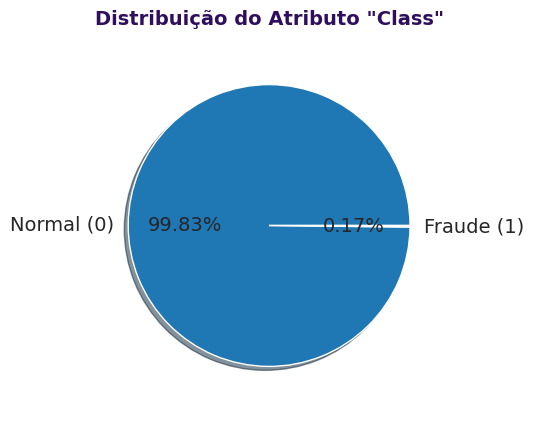

In [332]:
# plotando um gráfico pizza mostrando a distribuição do atributo "Class"
counts = dataset['Class'].value_counts()
labels = ["Normal (0)", "Fraude (1)"] #labels = counts.index
explode = (0, 0)

# Definindo as linhas gerais do gráfico
plt.figure(figsize = (4, 5))
plt.pie(x=counts, labels=labels, explode=explode, autopct = '%1.2f%%', startangle=0, shadow=True, textprops={'fontsize': 14})
plt.title('Distribuição do Atributo "Class"', weight = 'bold', color = '#2F0F5D', fontsize = 14)
plt.axis('equal')
plt.show()

Apenas **0,17%** (**492** ocorrências) das transações foram fraudulentas. Isso significa que temos dados altamente desequilibrados em relação ao atributo **"Class"**.

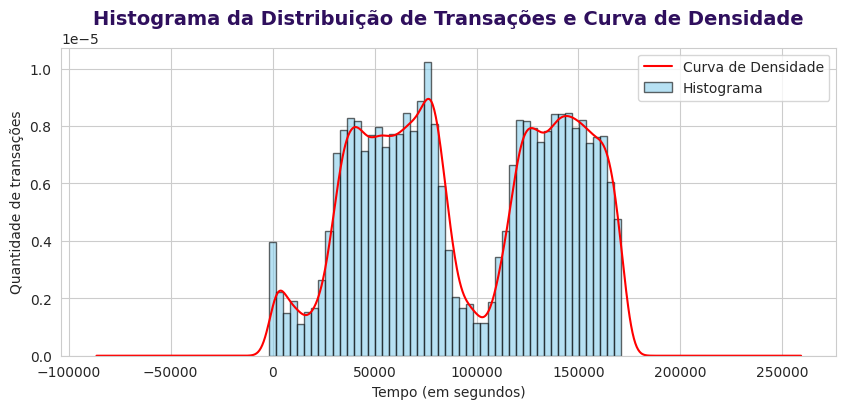

In [333]:
# plotando um histograma de distribuição de transações com curva de densidade sobreposta
# cira os subplots
fig, ax = plt.subplots(figsize = (10, 4))

# plota histagrama
ax.hist((dataset['Time']), bins = 50, edgecolor = 'black', alpha = 0.6, color = 'skyblue', align = 'left', density = True)
ax.set_title('Histograma da Distribuição de Transações e Curva de Densidade', weight = "bold", color = "#2F0F5D", fontsize = 14)


# plota curva de desnidade
dataset['Time'].plot(kind = 'kde', color = 'red', ax = ax)

# definindo as label x e y
ax.set_xlabel('Tempo (em segundos)')
ax.set_ylabel('Quantidade de transações')

# plota legenda
ax.legend(['Curva de Densidade', 'Histograma'])

# mostra gráfico
plt.show();

Percebemos que há uma clara diferença na quantidade de transações com cartões de crédito com relação ao tempo. Verificamos que elas ocorrem de forma cíclica durante as 48h de registro do nosso *dataset*, dependendo do horário, havendo maior número durante o dia, e diminuindo o número de transações à noite, o que faz todo sentido.

## 4 Análise Exploratória de Dados
---

Independentemente do domínio ou da aplicação, a análise exploratória de dados - com base na estatística - é uma ferramenta essencial para a compreensão do mundo por meio dos dados.

Ela permite analisar dados de maneira significativa, fornecendo uma estrutura lógica e objetiva que permite explorar padrões, tomar decisões e validar conclusões por meio de métodos científicos. Desta forma o analista de dados consegue um entendimento básico de seus dados e das relações existentes entre as variáveis analisadas.

### 4.1. Transações por Tempo

Verificaremos se existe alguma correlação entre o tempo de espera de uma transação e a fraude/não fraude.

In [334]:
# plotanto a correlação entre transações normais e fraude
class_0 = dataset.loc[dataset['Class'] == 0]["Time"]
class_1 = dataset.loc[dataset['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Não Fraude', 'Fraude']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Densidade de Transações por tempo', xaxis=dict(title='Tempo em segundos'), yaxis=dict(title='Transações'))
fig.show();

As transações fraudulentas têm uma distribuição mais uniforme do que as transações válidas, já que ambas são distribuídas igualmente em relação ao tempo, o que demonstra que os fraudadores agem até mesmo durante a noite, mostrando não haver um comportamento cronológico para a ação de fraudadores.

Vejamos mais detalhes do comportamento da distribuição de tempo de ambas as classes de transação (normal e fraudulenta), bem como dos valores agregados de contagem e quantidade de transações, classificados por hora.

In [335]:
# convertendo a unidade de tempo para horas, dividindo a atributo "Time" por 3600, e adicionando o atributo "Hour" em nosso dataset
dataset['Hour'] = dataset['Time'].apply(lambda x: np.floor(x / 3600))

tmp = dataset.groupby(['Hour', 'Class'])['Amount'].aggregate(['sum', 'min', 'max', 'count', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Sum', 'Min', 'Max', 'Transactions',  'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Sum,Min,Max,Transactions,Mean,Median,Var
0,0.0,0,256572.87,0.0,7712.43,3961,64.774772,12.990,45615.821201
1,0.0,1,529.00,0.0,529.00,2,264.500000,264.500,139920.500000
2,1.0,0,145806.76,0.0,1769.69,2215,65.826980,22.820,20053.615770
3,1.0,1,298.93,59.0,239.93,2,149.465000,149.465,16367.832450
4,2.0,0,106989.39,0.0,4002.88,1555,68.803466,17.900,45355.430437


A seguir veremos os resultados da tabela acima por meio de uma interpretação gráfica, separados por "**Class** (Normal e Fraude)".

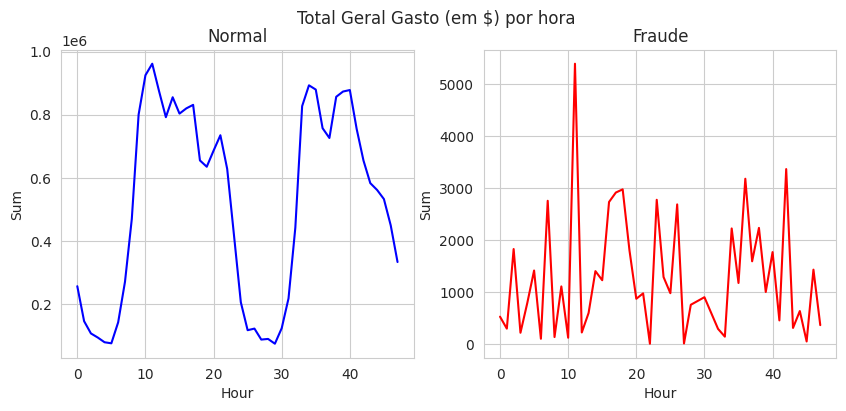

In [336]:
# plotando 2 gráficos lado a lado (Fraude e Normal) - Total Geral Gasto
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
#plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0], color="blue").set(title="Normal")
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red").set(title="Fraude")
plt.suptitle("Total Geral Gasto (em $) por hora")
plt.show();

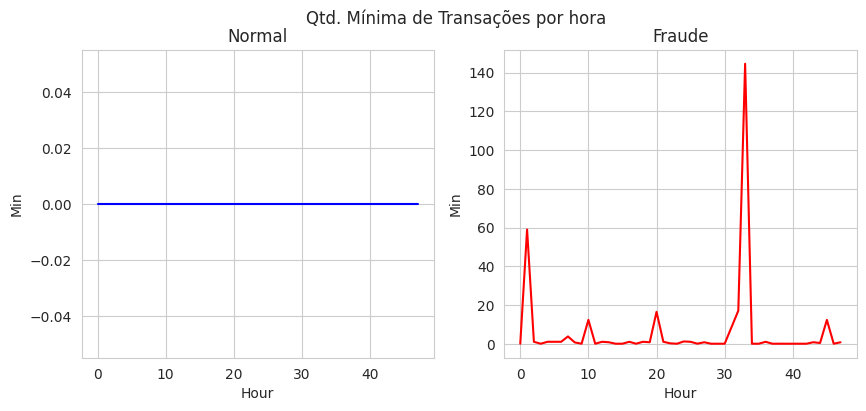

In [337]:
# plotando 2 gráficos lado a lado (Fraude e Normal) - Qtd. Mínima de Transações
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0], color="blue").set(title="Normal")
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red").set(title="Fraude")
plt.suptitle("Qtd. Mínima de Transações por hora")
plt.show();

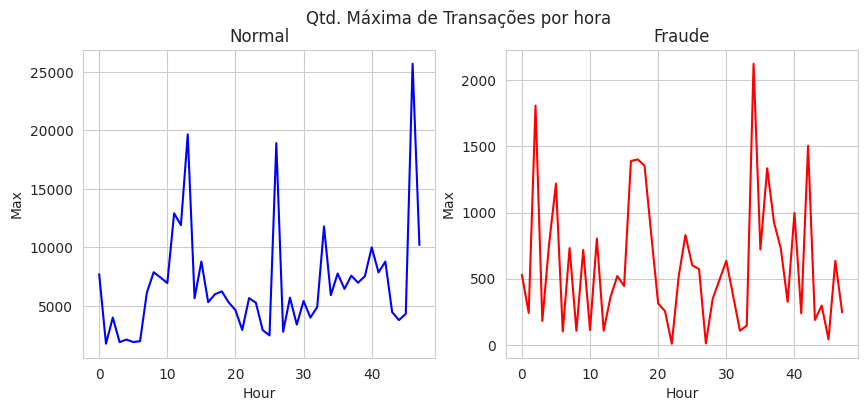

In [338]:
# plotando 2 gráficos lado a lado (Fraude e Normal) - Qtd. Máxima de Transações
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0], color="blue").set(title="Normal")
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red").set(title="Fraude")
plt.suptitle("Qtd. Máxima de Transações por hora")
plt.show();

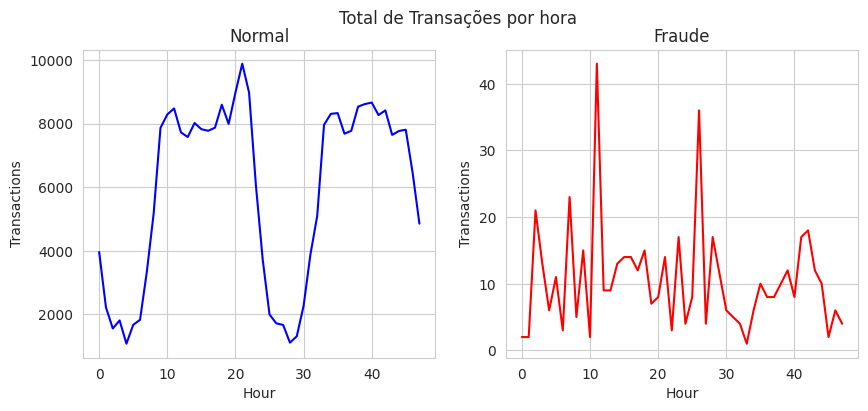

In [339]:
# plotando 2 gráficos lado a lado (Fraude e Normal) - Total de Transações
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0], color="blue").set(title="Normal")
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red").set(title="Fraude")
plt.suptitle("Total de Transações por hora")
plt.show();

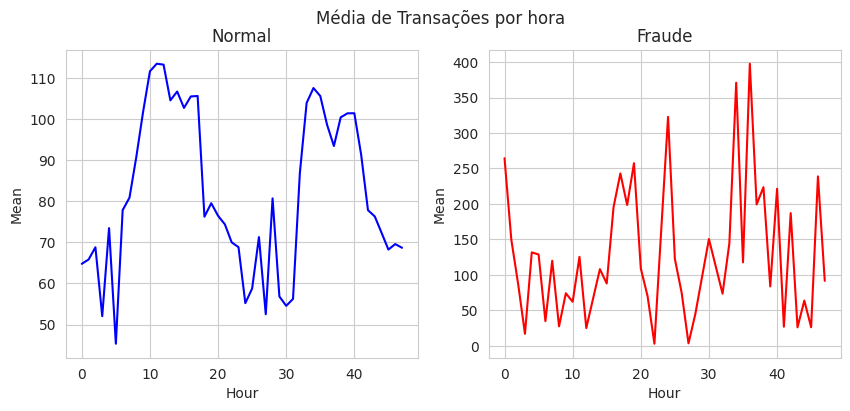

In [340]:
# plotando 2 gráficos lado a lado (Fraude e Normal) - Qtd. Média de Transações
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0], color="blue").set(title="Normal")
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red").set(title="Fraude")
plt.suptitle("Média de Transações por hora")
plt.show();

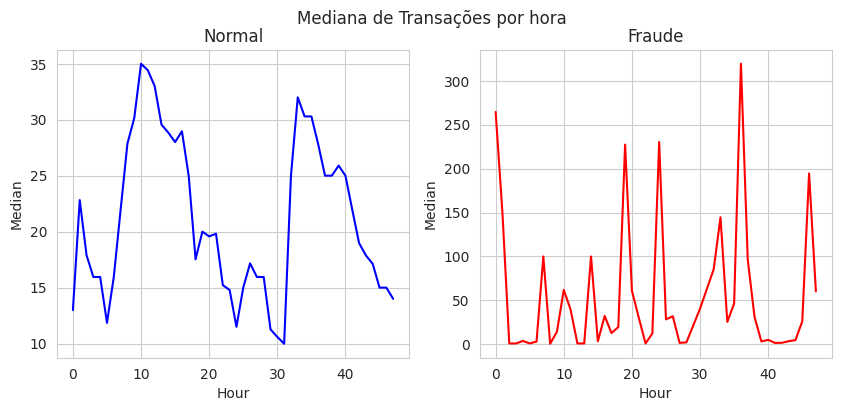

In [341]:
# plotando 2 gráficos lado a lado (Fraude e Normal) - Qtd. Mediana de Transações
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0], color="blue").set(title="Normal")
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red").set(title="Fraude")
plt.suptitle("Mediana de Transações por hora")
plt.show();

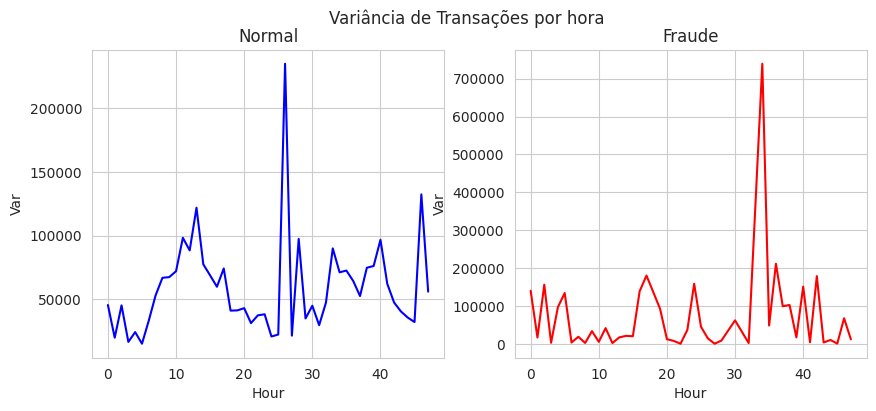

In [342]:
# plotando 2 gráficos lado a lado (Fraude e Normal) - Variância de Transações
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
s = sns.lineplot(ax = ax1, x="Hour", y="Var", data=df.loc[df.Class==0], color="blue").set(title="Normal")
s = sns.lineplot(ax = ax2, x="Hour", y="Var", data=df.loc[df.Class==1], color="red").set(title="Fraude")
plt.suptitle("Variância de Transações por hora")
plt.show();

A visualização gráfica de valores de somatório de valores, mínimos, máximos, totais de transações, média, mediana e variância pôde trazer uma maior profundidade à analise dos dados, já que é bem mais fácil trabalhar com uma determinada informação quando registramos visualmente seus limites e comportamento.

### 4.2. Valor das Transações

Analisaremos o valor das transações por meio de *boxplot* (ou caixa de bigodes), gráfico que mostra a forma, a tendência central e a variabilidade dos dados. Esse gráfico foi escolhido porque é capaz de exibir a distribuição de dados tendo como base um resumo de cinco valores: mínimo, primeiro quartil (Q1 ou 25%), mediana ou segundo quartil (Q2 ou 50%), terceiro quartil (Q3 ou 75%), máximo ou quarto quartil (Q4 ou 100%). Também é capaz de mostrar os *outliers*, ou seja, valores atípicos que se afastaram demais da série.

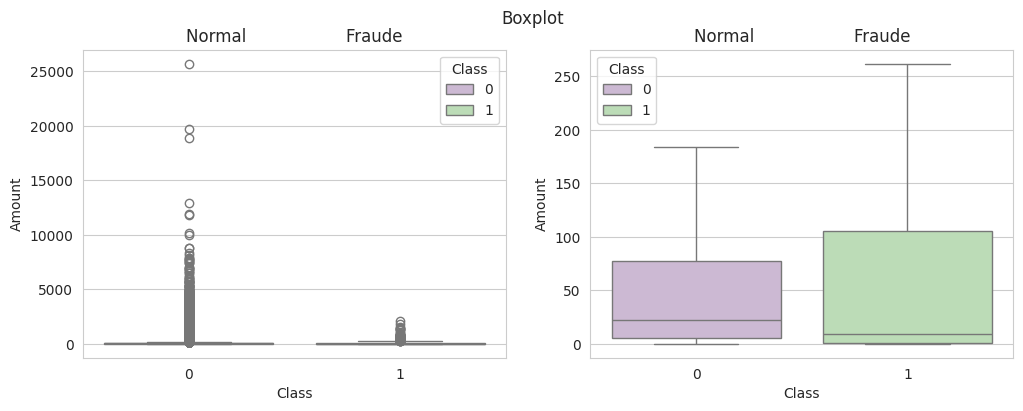

In [343]:
# plotando 2 gráficos boxplot lado a lado (Fraude e Normal)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=dataset, palette="PRGn",showfliers=True).set(title="Normal                   Fraude")
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=dataset, palette="PRGn",showfliers=False).set(title="Normal                   Fraude")
plt.suptitle("Boxplot")
plt.show();

Comparando as linhas medianas de cada *boxplot*, como elas estão ambas dentro das suas caixas, vemos que não há grandes diferenças entre as duas classes (normal e fraude). Percebemos que os *outliers* são mais comuns em transações normais. Também verificamos que as transações fraudulentas são feitas - em sua maioria - com valores menores que as transações normais, talvez motivadas para não despertarem suspeitas. Por outro lado, o valor das fraudes ocorre em uma faixa maior de valor (*boxplot* com maior área).

Veremos a seguir a descrição estatística da classe 0 (transação normal, ou seja, sem fraude).

In [344]:
# descrevendo estatisticamente a classe 0
tmp_df = dataset[['Amount','Class']].copy()
class_0 = tmp_df.loc[tmp_df['Class'] == 0]['Amount']
class_0.describe() # descrição estatística da classe 0 (normal, não fraude)

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Agora exibimos a descrição estatística da classe 1 (transação fraudulenta).

In [345]:
# descrevendo estatisticamente a classe 1
class_1 = tmp_df.loc[tmp_df['Class'] == 1]['Amount']
class_1.describe() # descrição estatística da classe 1 (fraude)

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Podemos concluir que a transação normal tem valor médio maior, Q1 maior, Q3 e Q4 menores e outliers maiores; transações fraudulentas têm um Q1 e média menores, um Q4 maior e valores discrepantes menores.

Vamos representar graficamente as transações fraudulentas (**Amount**) em relação ao tempo. O tempo mostrado é em segundos, a partir do início do período (total de 48h, ou seja, durante 2 dias).

In [346]:
fraud = dataset.loc[dataset['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Quantidade de transações fraudulentas',
          xaxis = dict(title = 'Time [s]', showticklabels=True),
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)

plot(fig);
# fig.show()

### 4.3. Seleção de Características

Transformação de Dados é uma das partes da etapa de pré-processamento de dados. Mas, como vimos anteriormente, nosso *dataset* já veio com sua dimensionalidade reduzida (pelo método PCA) para não expor dados sensíveis dos clientes de cartão de crédito.

Outra etapa do pré-procesamento é a Seleção de Características (*Feature Selection*). A lógica por trás do uso da correlação para seleção de características é descobrir quais variáveis se relacionam com a variável alvo "Class".

Se duas variáveis estiverem correlacionadas, podemos prever uma a partir da outra. Portanto, se duas características estão correlacionadas, o modelo necessita apenas de uma, pois a segunda não agrega informações adicionais.

Para esse caso, usaremos a correlação de **Pearson**, porque quando se trata de analisar dados e tomar decisões assertivas, a correlação de Pearson é considerada uma ferramenta muito útil.

O coeficiente de correlação de Pearson pode ter um intervalo de valores de +1 a -1. Um valor de 0 indica que não há associação entre as duas variáveis. Um valor maior que 0 indica uma associação positiva. Isto é, à medida que o valor de uma variável aumenta, o mesmo acontece com o valor da outra variável.

Precisamos definir um valor absoluto, digamos 0.5 (meio), como limite para seleção das variáveis. Se descobrirmos que as variáveis preditoras estão correlacionadas (cores mais escuras), podemos descartar a variável analisada com um valor de coeficiente de correlação inferior ao da variável alvo.

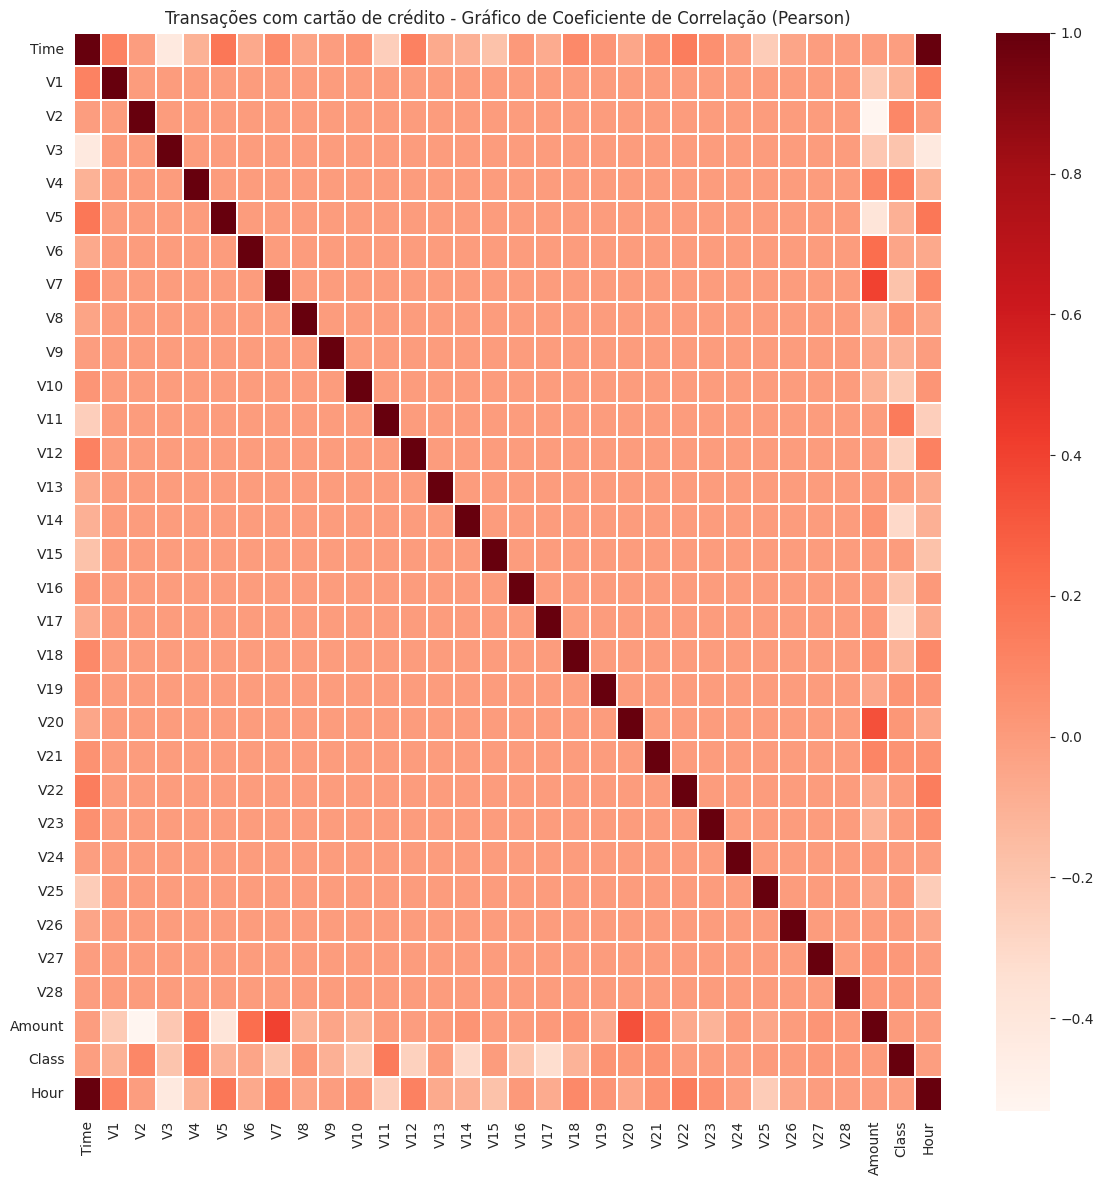

In [347]:
# plotando o gráfico de Pearson
plt.figure(figsize = (14,14))
plt.title('Transações com cartão de crédito - Gráfico de Coeficiente de Correlação (Pearson)')
corr = dataset.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show();

Como esperado, não há correlação notável entre os recursos **V1** a **V28** (linha escura diagonal central).

Verificamos que há certas correlações entre alguns desses recursos e o atributo **Time** (correlação inversa com **V3**) e o atributo **Amount** (correlação direta com **V7** e **V20**, correlação inversa com os atributos **V2** e **V5**).

Vamos traçar os atributos correlacionados e inversamente correlacionados no mesmo gráfico. Iremos começar com os atributos diretamente correlacionados: (V7 vs Amount) e (V20 vs Amount).

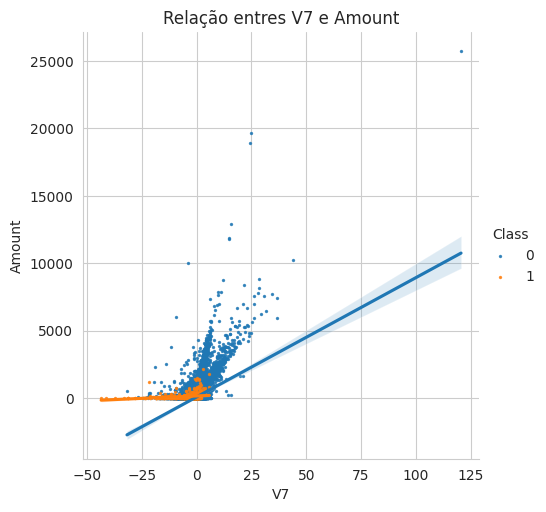

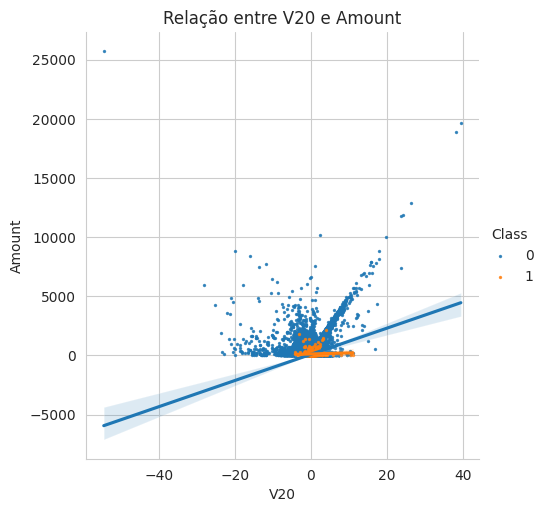

In [348]:
# plotando atributos diretamente correlacionados (V20 e V7 com Amount)
s = sns.lmplot(x='V7', y='Amount',data=dataset, hue='Class', fit_reg=True,scatter_kws={'s':2}).set(title="Relação entres V7 e Amount")
s = sns.lmplot(x='V20', y='Amount',data=dataset, hue='Class', fit_reg=True,scatter_kws={'s':2}).set(title="Relação entre V20 e Amount")
plt.show();

Podemos confirmar que os dois pares de características V7 e V20 estão correlacionados (as linhas de regressão para **Class = 0** têm uma inclinação positiva, enquanto a linha de regressão para **Class = 1** tem uma inclinação positiva um pouco menor).

Vamos traçar agora os atributos correlacionados inversamente.

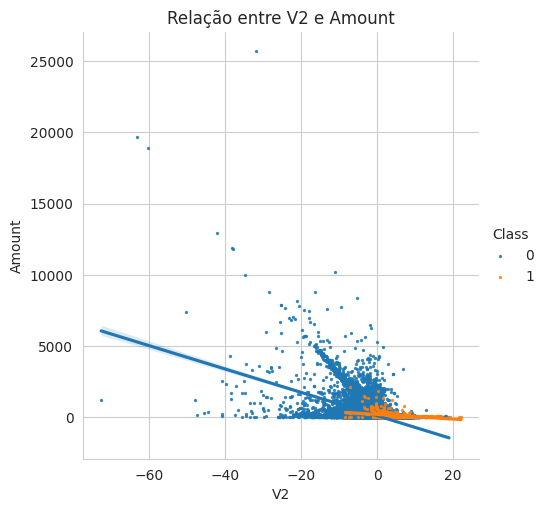

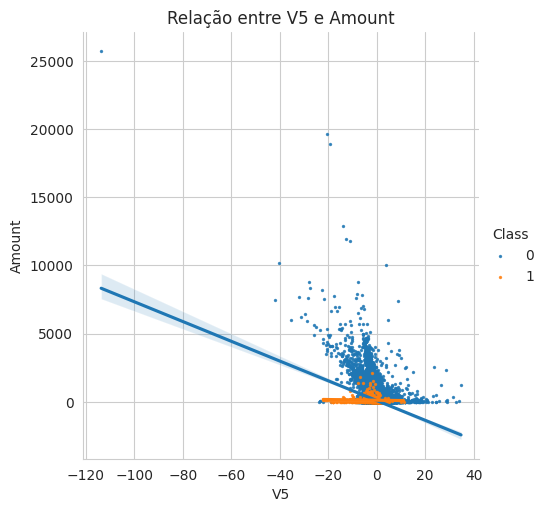

In [349]:
# plotando atributos inversamente correlacionados (V2 e V5 com Amount)
s = sns.lmplot(x='V2', y='Amount',data=dataset, hue='Class', fit_reg=True,scatter_kws={'s':2}).set(title="Relação entre V2 e Amount")
s = sns.lmplot(x='V5', y='Amount',data=dataset, hue='Class', fit_reg=True,scatter_kws={'s':2}).set(title="Relação entre V5 e Amount")
plt.show();

Podemos confirmar que os dois pares de características V2 e V5 são inversamente correlacionados (as linhas de regressão para **Class = 0** têm uma inclinação negativa, e as linhas de regressão para **Class = 1** têm uma pequena inclinação negativa).

### 4.4. Curva de Densidade

O gráfico Curva de Densidade (*Feature Density*) possui a mesma função do histograma, mas representa a distribuição por meio de uma curva contínua. A altura da curva no eixo vertical representa uma estimativa da probabilidade de um elemento possuir aquele determinado valor. Para cada atributo do *dataset*  foram traçadas curvas de densidade para "**Class**" 0 e 1 usando a função **KDE** (*Kernel Density Estimation*).

<Figure size 640x480 with 0 Axes>

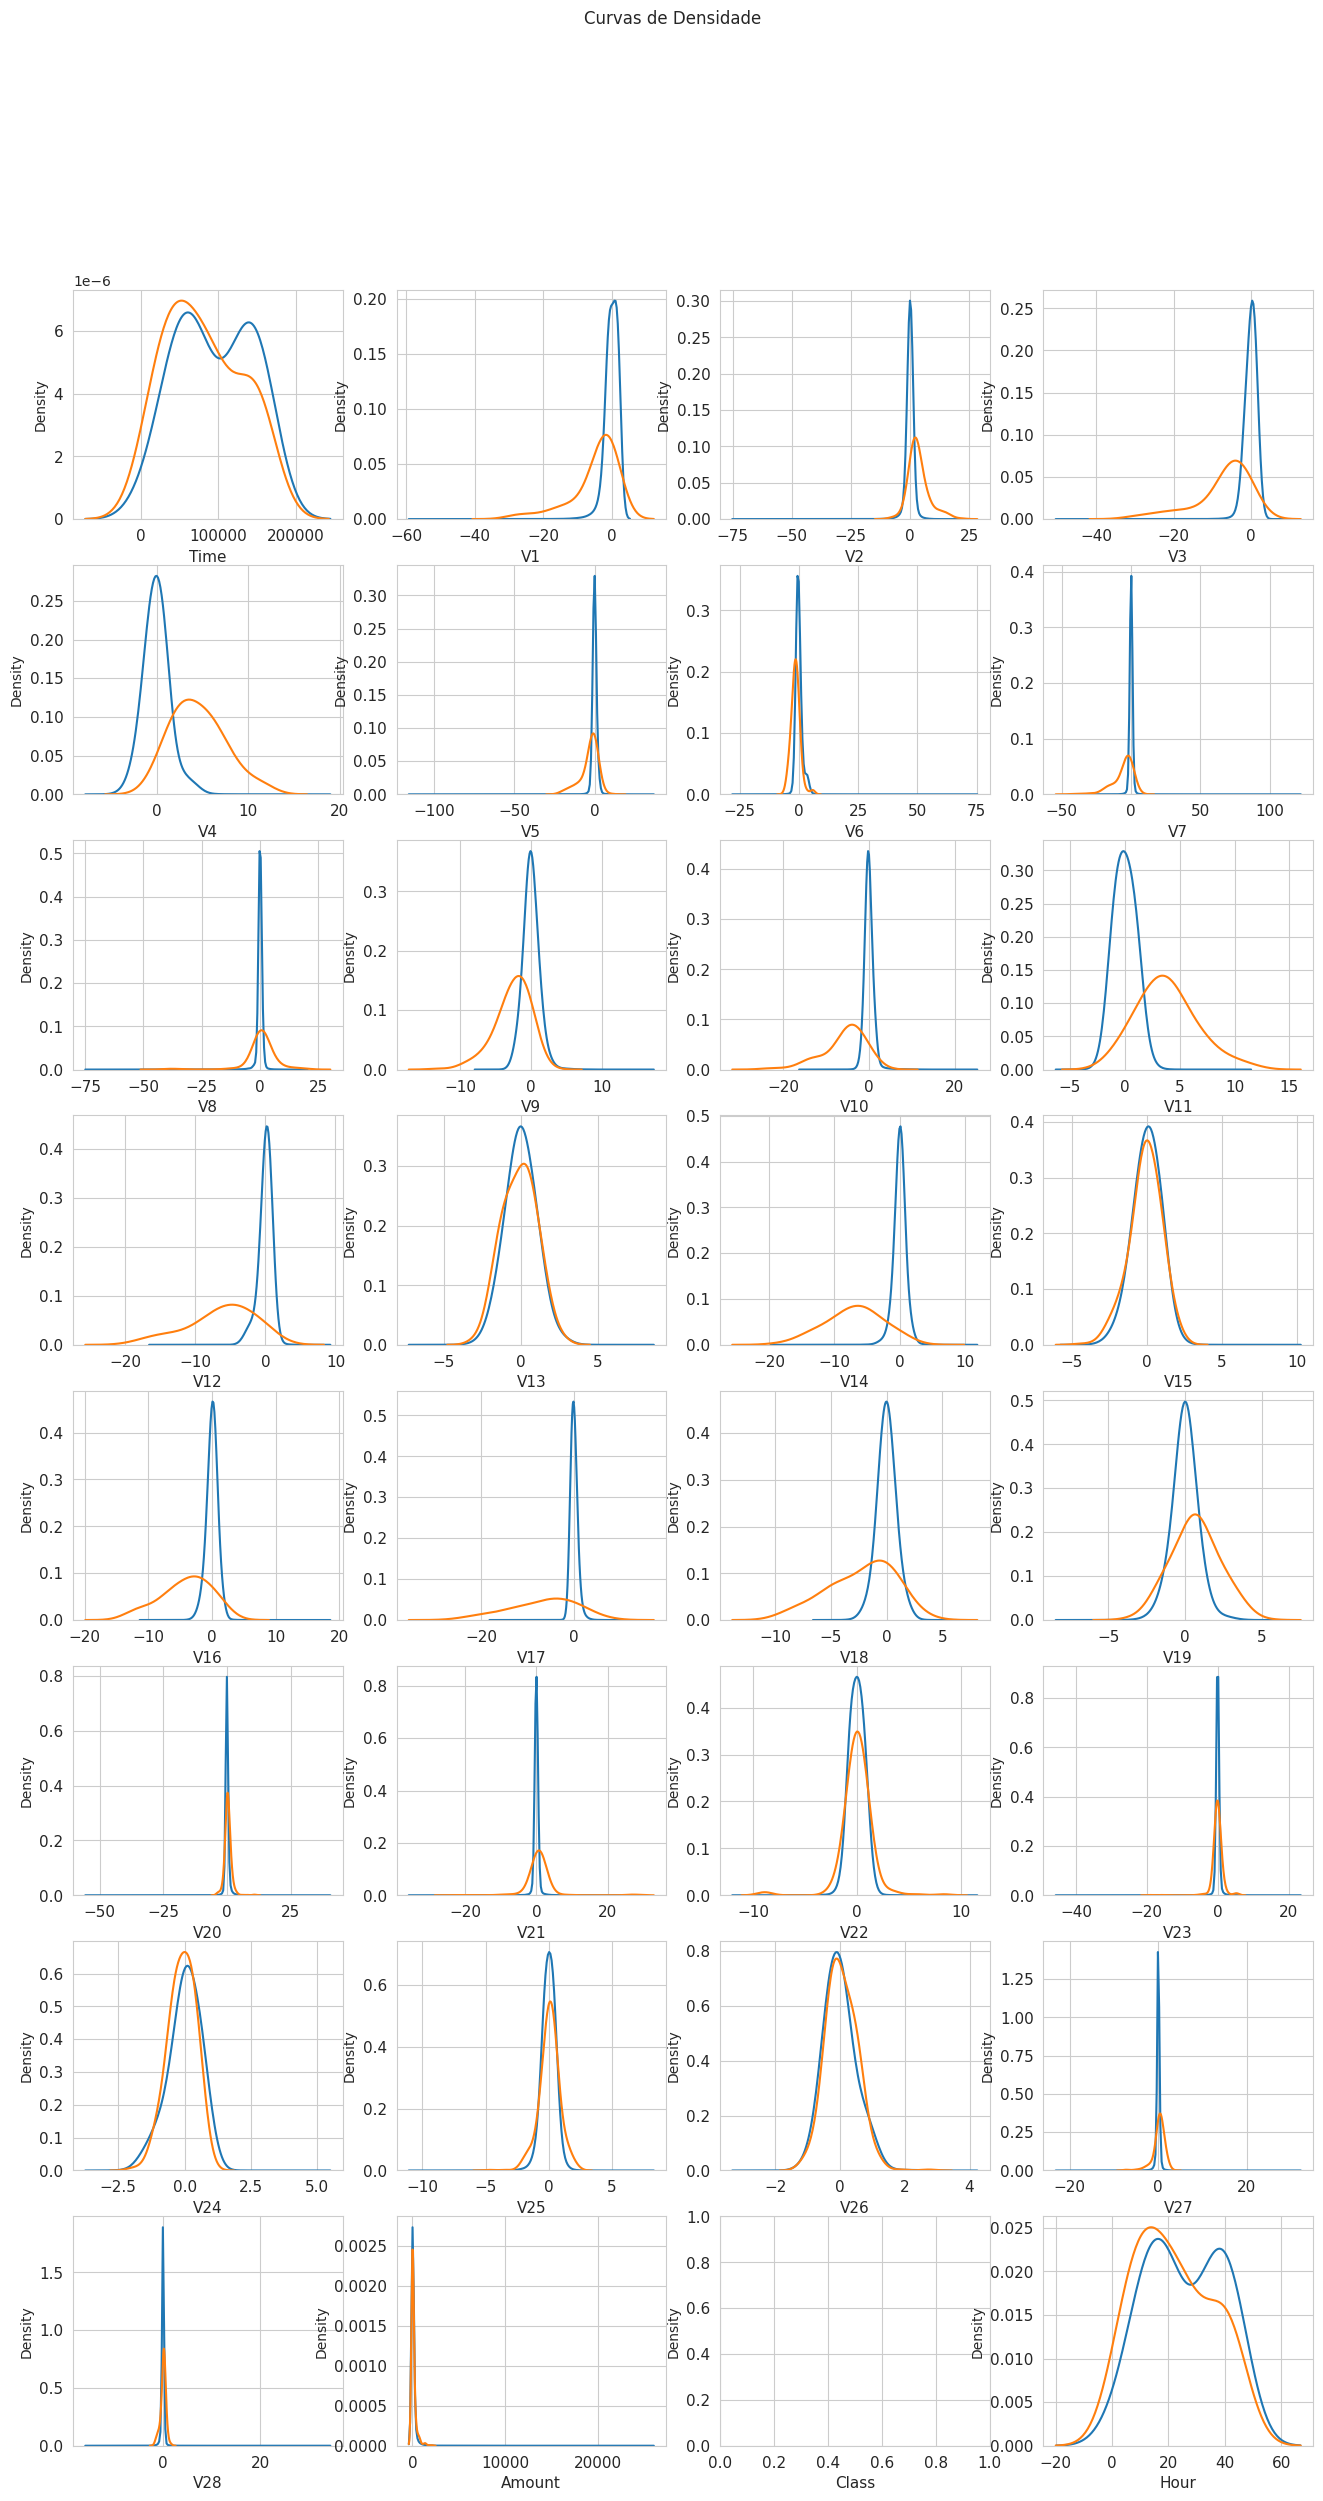

In [350]:
var = dataset.columns.values
i = 0
class_0 = dataset.loc[dataset['Class'] == 0]
class_1 = dataset.loc[dataset['Class'] == 1]
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

# plota "Feature Density" para todos os atributos
for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(class_0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(class_1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=11)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=11)
    plt.suptitle("Curvas de Densidade")
fig.show();

Para algumas das características podemos observar uma boa seletividade em termos de distribuição para os dois valores de **"Class"**. **V4** e **V11** tem os valores com distribuições claramente diferentes para os valores de **0 e 1**; **V12**, **V14** e **V18** estão parcialmente separados; **V1**, **V2**, **V3** , **V10** possuem um perfil próprio, enquanto **V25**, **V26**, **V28** possuem perfis semelhantes para os dois valores de **Class**.

Em geral, com poucas exceções (**Time** e **Hour**), a distribuição de características para transações legítimas (**Class = 0**) é centrada em torno de 0, às vezes com uma longa fila em uma das extremidades. Ao mesmo tempo, as transações fraudulentas (**Class = 1**) costumam apresentar uma distribuição mais assimétrica.

### 4.5. Otimização de Hiperparâmetros

Hiperparâmetros são valores que controlam aspectos de treinamento do modelo de machine learning tais como a taxa de aprendizado, a regularização, o número de iterações e muitos outros. Os algoritmos podem ter diversos hiperparâmetros, que podem receber diversos valores para construir um modelo, já que muitas vezes encontrar a melhor combinação de hiperparâmetros utilizando "tentativa-erro" pode ser uma tarefa demorada e cansativa.

Por isso a otimização de hiperparâmetros (*tuning*) é um passo crucial no desenvolvimento de modelos de ML. É por meio dela que podemos fazer o ajuste dos parâmetros nos algoritmos, pois a escolha adequada dos seus valores possibilita encontrar um modelo com melhor desempenho; enquanto o uso de valores errados pode resultar em modelos que não atendam completamente às expectativas (podendo ocorrer o *overfitting* ou o *underfitting*).

Para ajudar a resolver o problema da otimização de hiperparâmetros, a biblioteca *scikit-learn* fornece uma funcionalidade conhecida como **Grid search**. Nela podemos informar em um "*grid*" quais hiperparâmetros queremos testar, bem como o conjunto de valores que queremos variar para cada um deles.

## 5 Preparação de Dados
---

A preparação de dados é uma tarefa que deve ser realizada com cautela, para evitar um conhecido problema chamado de Vazamento de Dados (*data leakage*). Isso ocorre quando há o “vazamento” dos dados de teste para os dados de treino, ou seja, como se as informações de teste fossem reveladas durante o treinamento, causando ao final uma estimativa incorreta para o modelo.



Iremos agora definir a lista dos atributos preditores (**Predictors**) e a variável alvo (**Target**). Características categóricas, se houvessem, também poderiam ser definidas nesse ponto do projeto (no caso do nosso *dataset*, não há necessidade do uso desse recurso de classificação).

In [351]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

Nesse ponto, a partir do nosso *dataset* original, vamos definir os subconjuntos de dados de treinamento (**Tran_df**), validação (**Valid_df**) e teste (**Test_df**), com o tamanho dos subconjuntos parametrizados no início do nosso MVP.

In [352]:
# Pega o dataset e divide em train_df e test_df (usando parâmetro TEST_SIZE)
train_df, test_df = train_test_split(dataset, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
# Pega o train_df e divide em train_df e valid_df (reduzindo o train_df com o parâmetro VALID_SIZE)
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/MVP2_Divisao_Dataset.jpg" width="600"/>

In [353]:
# calculando a taxa de divisão do dataset
dataset_size = len(dataset.index)
train_size = (len(train_df.index)/dataset_size)*100
test_size = (len(test_df.index)/dataset_size)*100
valid_size = (len(valid_df.index)/dataset_size)*100

# mostrando o percentual do tamanho em cada subconjunto de dados
print(f'Nosso Dataset foi dividido em train_df ({train_size:.2f}%), valid_df ({valid_size:.2f}%) e test_df ({test_size:.2f}%)')

Nosso Dataset foi dividido em train_df (64.00%), valid_df (16.00%) e test_df (20.00%)


## 7 Métodos Ensemble
---

A técnica de ML que combina múltiplos algoritmos - em busca de produzir um modelo preditivo mais robusto - é chamada de *ensemble* (ou conjugados), e que possui métodos sequenciais (dependentes do modelo base) ou paralelos (independentes). Os métodos *ensemble* mais populares são os das classes *bagging, boosting e voting*.

Para avaliar os métodos usaremos as curvas ROC (*Receiver Operating Characteristic*) obtendo o valor AUC (*area under the ROC curve*), que é uma das métricas mais populares para a avaliação de um modelo de ML.

Uma curva ROC é a forma mais comumente usada para visualizar o desempenho de um classificador binário, e AUC é considerada a melhor maneira de resumir seu desempenho em um único número.

Um modelo cujas previsões estão 100% erradas tem uma AUC de 0, enquanto um modelo cujas previsões são 100% corretas tem uma AUC de 1, e o limiar de predição na classificação é 0,5 (avaliador aleatório). Ou seja, acima desse limite, o algoritmo consegue ter efetividade para classificar uma classe.

Cada modelo ROC apresentará um determinado valor de AUC, o que irá auxiliar na escolha do melhor, como apresentado no exemplo gráfico abaixo:

<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/MVP2_Curvas_ROC-AUC.jpg" width="600"/>

O ponto interessante do AUC é que a métrica não varia conforme a escala, já que não usa valores absolutos.

Decidimos nesse MVP testar alguns desses algoritmos em nosso *dataset*. A escolha aqui foi pela consideração dos métodos mais populares de cada *ensemble*. Vamos começar pelo método *ensemble* do tipo *bagging*.

### 7.1. Random Forest

*Ensembles* do tipo *bagging* são modelos feitos de vários tipos de algoritmos utilizando diferentes subamostras do conjunto de dados de treinamento.

Um exemplo muito conhecido dos *ensembles* do tipo *bagging* é o modelo *Random Forest* (ou Floresta Aleatória), sendo uma evolução do *bagging* tradicional com algoritmos de árvores de decisão. Ele combina as predições de múltiplas árvores de decisão, e em seguida faz-se uma votação para chegar a um único resultado.

Para tal, iremos usar a função **RandomForestClassifier**. Inicialmente definiremos os parâmetros do modelo, e em seguida treinaremos o modelo usando o conjunto de dados de treinamento. Depois, então, usaremos o conjunto de validação para realizar a validação.

Utilizaremos como critério de validação **Gini**, cuja fórmula é **Gini = 2 * (AUC) - 1**, onde **AUC** é a **"Area Under Curve"**. O número de estimadores é definido em **NUM_ESTIMATORS** e o número de trabalhos paralelos é definido em **NO_JOBS**.



Começamos inicializando o *RandomForestClassifier*.

In [354]:
clf = RandomForestClassifier(n_jobs=NO_JOBS,
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

Vamos treinar o **RandonForestClassifier** usando os dados **Train_df** e a função **Fit**.

In [355]:
clf.fit(train_df[predictors], train_df[target].values) # demora um pouco (5 min)...

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

Vamos agora prever os valores para os dados **Valid_df**, usando a função **Predict**.

In [356]:
preds = clf.predict(valid_df[predictors])

Vamos também visualizar a importância dos atributos.


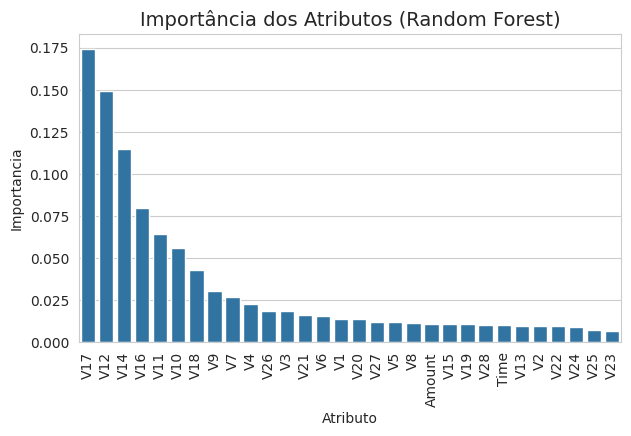

In [357]:
# plotando o gráfico de importância para Random Forest
tmp = pd.DataFrame({'Atributo': predictors, 'Importancia': clf.feature_importances_})
tmp = tmp.sort_values(by='Importancia',ascending=False)
plt.figure(figsize=(7,4))
plt.title('Importância dos Atributos (Random Forest)',fontsize=14)
s = sns.barplot(x='Atributo',y='Importancia',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

Descobrimos que as características mais importantes são para os atributos **V17**, **V12**, **V14**, **V16**, **V11** e **V10**.




#### 7.1.1 Matriz de Confusão

Iremos mostrar uma matriz de confusão para os resultados que obtivemos.

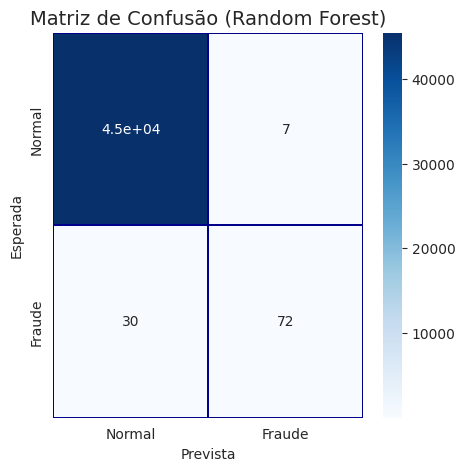

In [358]:
# plotando matriz de confusão para Random Forest
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Esperada'], colnames=['Prevista'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Normal', 'Fraude'],
            yticklabels=['Normal', 'Fraude'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Matriz de Confusão (Random Forest)', fontsize=14)
plt.show();

#### 7.1.2 Erro Tipo I e II

Confirmamos acima que a matriz de confusão não é a melhor ferramenta para representar os resultados no nosso caso, em que os dados de fraude e não fraude são desequilibrados.

Na verdade precisaremos de uma métrica diferente que leve em conta ao mesmo tempo tanto a seletividade como a especificidade do método que estamos usando, de modo a minimizar ao mesmo tempo tanto os erros *Tipo I* como os do *Tipo II*.

Lembrando que, quando você rejeita algo que é verdadeiro, você está cometendo um erro do *Tipo I*. E quando não está rejeitando algo falso, você está cometendo um erro do *Tipo II*.

**Hipótese Nula** (**H0**) - A transação não é uma fraude.

**Hipótese Alternativa** (**H1**) - A transação é uma fraude.

**Erro tipo I** - Você rejeita a hipótese nula quando a hipótese nula é realmente verdadeira.

**Erro tipo II** - Você não consegue rejeitar a hipótese nula quando a hipótese alternativa é verdadeira.

**Custo do erro Tipo I** - Você presume erroneamente que a transação é uma fraude e uma transação verdadeira é rejeitada.

**Custo do erro Tipo II** - Você presume erroneamente que a transação não é uma fraude e uma transação fraudulenta é aceita.

A seguir explicamos graficamente o que são erros *Tipo I* e *II*:

<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/MVP2_Tipo_1_2_a.jpg" width="600"/>


Esta imagem abaixo explica de forma didática as difereças entre *Tipo I e II*:

<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/MVP2_Tipo_1_2.jpg" width="600"/>

Vamos calcular agora a área sobre a curva **ROC** calculando **AUC**.

In [359]:
print(f"A pontuação AUC obtida com o modelo RandomForrestClassifier foi de {roc_auc_score(valid_df[target].values, preds):.4f}")

A pontuação AUC obtida com o modelo RandomForrestClassifier foi de 0.8529


### 7.2 Adaptive Boosting

Os *ensembles* do tipo *boosting* são modelos sequenciais. Eles criam uma sequência de modelos na qual um modelo tenta corrigir os erros dos modelos anteriores.

*Adaptive Boosting* (*Ada Boost*) foi o primeiro modelo de *boosting* bem-sucedido, e continua sendo um dos mais utilizados e estudados, sendo considerado o mais popular.

É um modelo meta-heurístico, e pode ser utilizado para aumentar a performance de outros algoritmos de aprendizagem. *Ada Boost* identifica em cada iteração os pontos de dados classificados incorretamente, modificando seus pesos para que o próximo classificador melhore seus acertos. Para testar esse modelo usaremos o **AdaBoostClassifier**.

Vamos a seguir definir os parâmetros, inicializá-lo e ajustar o modelo com a função "**Fit**".

In [360]:
# Iniciando o modelo
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

# Ajustando do modelo
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

Vamos agora prever os valores **Target** para os dados **Valid_df**, usando a função "**Predict**".

In [361]:
preds = clf.predict(valid_df[predictors])

Veremos também a importância dos atributos para *Ada Boost*.

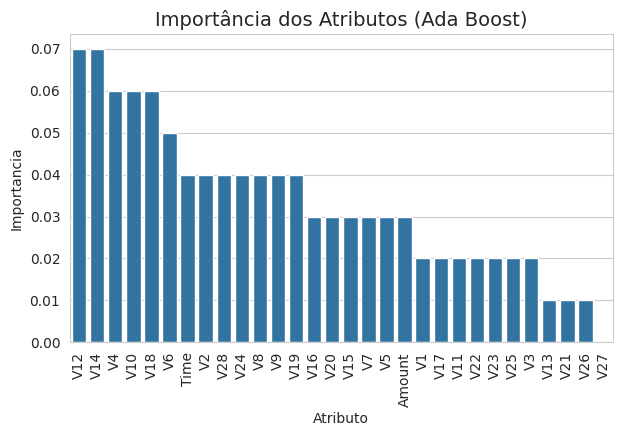

In [362]:
# plotando o gráfico de importância para Ada Boost
tmp = pd.DataFrame({'Atributo': predictors, 'Importancia': clf.feature_importances_})
tmp = tmp.sort_values(by='Importancia',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Importância dos Atributos (Ada Boost)',fontsize=14)
s = sns.barplot(x='Atributo',y='Importancia',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

Verificamos que os atributos mais importantes são **V12**, **V14**, **V4**, **V10**, **V18** e **V6**.

Visuaremos a seguir a matriz de confusão do *Ada Boost*.

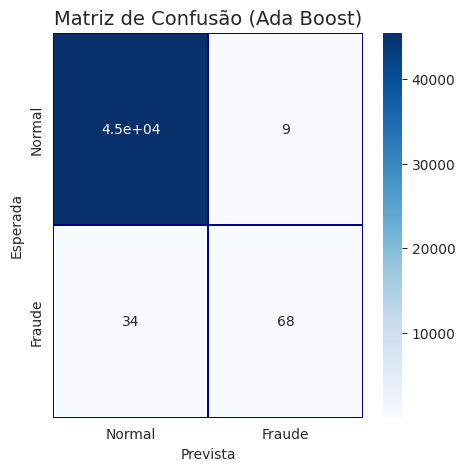

In [363]:
# plotando matriz de confusão para Ada Boost
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Esperada'], colnames=['Prevista'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Normal', 'Fraude'],
            yticklabels=['Normal', 'Fraude'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Matriz de Confusão (Ada Boost)', fontsize=14)
plt.show();

Vamos calcular a área sobre a curva **ROC** calculando **AUC**.

In [364]:
print(f"A pontuação AUC obtida com o modelo AdaBoostClassifier foi de {roc_auc_score(valid_df[target].values, preds):.4f}")

A pontuação AUC obtida com o modelo AdaBoostClassifier foi de 0.8332


### 7.3 Category Boosting

Um dos vários modelos de *boosting* para árvores de decisão com suporte para manipulação de dados categóricos é o *Category Boosting* (*Cat Boost*). A vantagem desse algoritmo é saber lidar muito bem com variáveis categóricas de um jeito mais intuitivo que outros algoritmos baseados árvores de decisão. Para tal, usaremos o **CatBoostClassifier**.

O *Cat Boost*, por sua vez, tem dois grandes objetivos: evitar o *overfitting* e fornecer bons hiperparâmetros. *Cat Boost* usa uma estrutura de árvore chamada *Oblivious Tree*, onde cada nível da árvore tem o mesmo **split** para todos os ramos, e utiliza a abordagem *One-hot Encoding* quando um dado categórico tem duas categorias diferentes (0 e 1).

Vamos a seguir definir os parâmetros, inicializá-lo e ajustar o modelo com a função "**Fit**".

In [365]:
# Inicializando o modelo
clf = CatBoostClassifier(iterations=MAX_ROUNDS1,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)

# Ajustando o modelo
clf.fit(train_df[predictors], train_df[target].values,verbose=True)

0:	total: 518ms	remaining: 4m 18s
50:	total: 30.8s	remaining: 4m 31s
100:	total: 1m 8s	remaining: 4m 30s
150:	total: 1m 36s	remaining: 3m 43s
200:	total: 2m 3s	remaining: 3m 4s
250:	total: 2m 31s	remaining: 2m 30s
300:	total: 2m 58s	remaining: 1m 58s
350:	total: 3m 26s	remaining: 1m 27s
400:	total: 3m 53s	remaining: 57.7s
450:	total: 4m 20s	remaining: 28.4s
499:	total: 4m 47s	remaining: 0us


Vamos agora prever os valores **Target** para os dados **Valid_df**, usando a função "**Predict**".

In [366]:
preds = clf.predict(valid_df[predictors])

Vejamos também os atributos importantes no *Cat Boost*.

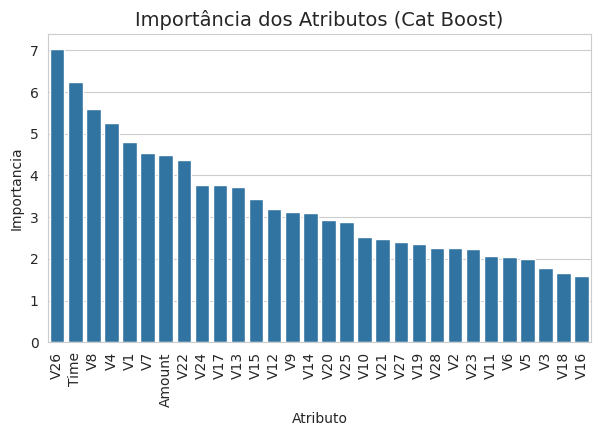

In [367]:
# plotando atributos importantes para Cat Boost
tmp = pd.DataFrame({'Atributo': predictors, 'Importancia': clf.feature_importances_})
tmp = tmp.sort_values(by='Importancia',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Importância dos Atributos (Cat Boost)',fontsize=14)
s = sns.barplot(x='Atributo',y='Importancia',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show();

Verificamos que para o *Cat Boost* os atributos que mais se destacam são **V26**, **V8**, **V4**, **V1**, **V7** e **V22**.

Vamos visualizar a matriz de confusão.

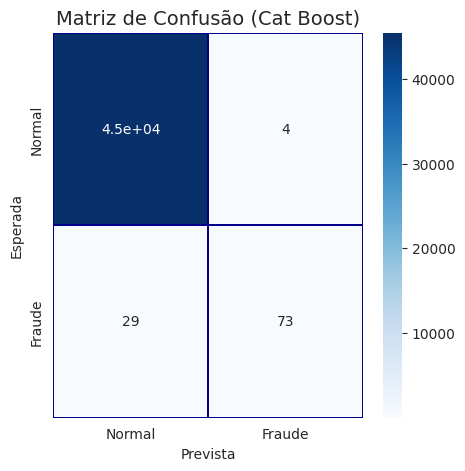

In [368]:
# plotando matriz de confusão para Cat Boost
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Esperada'], colnames=['Prevista'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Normal', 'Fraude'],
            yticklabels=['Normal', 'Fraude'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Matriz de Confusão (Cat Boost)', fontsize=14)
plt.show();

Vamos calcular a área sobre a curva **ROC** calculando **AUC**.

In [369]:
print(f"A pontuação AUC obtida com o modelo CatBoostClassifier após {MAX_ROUNDS1} iterações foi de {roc_auc_score(valid_df[target].values, preds):.4f}")

A pontuação AUC obtida com o modelo CatBoostClassifier após 500 iterações foi de 0.8578


### 7.4 eXtreme Gradient Boosting

Outro modelo de *boosting* é o *XGBoost*, e significa *eXtreme Gradient Boosting*. Pelo nome podemos deduzir que esse algoritmo é uma versão mais complexa do algorítmo *Gradient Boosting*. A principal diferença é que o *XGBoost* usa uma técnica de regularização, usando a métrica do erro diferenciável.

*XGBoost* costuma ser usado por instituições financeiras e bancos para identificar transações e padrões suspeitos. Ao treinar o modelo com dados históricos, o XGBoost é um algoritmo muito eficiente em classificar com precisão atividades fraudulentas.

Sendo assim, a performance desse algoritmo costuma ser mais flexível e robusta que outros modelos de *boosting*. Para tal usaremos o **XGB**.

Inicializaremos a variável **DMatrix** para treinamento e validação, começando pelos conjuntos de dados. Também definiremos alguns dos parâmetros utilizados para o ajuste do modelo.

In [370]:
# Preparando do "train_df" e validação do dataset ("valid_df" e "test_df")
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

# Definindo O que vamos monitorar (neste caso, "train" e "valid")
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Definindo dos parâmetros XGBoost
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

Aqui treinamos o modelo.

In [371]:
# treinando o modelo XGBoost
model = xgb.train(params,
                dtrain,
                MAX_ROUNDS1,
                watchlist,
                early_stopping_rounds=EARLY_STOP,
                maximize=True,
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.94070	valid-auc:0.88630
[50]	train-auc:0.94043	valid-auc:0.89529
[100]	train-auc:0.97414	valid-auc:0.96283
[150]	train-auc:0.98510	valid-auc:0.98126
[200]	train-auc:0.99295	valid-auc:0.98520
[250]	train-auc:0.99519	valid-auc:0.98406
[262]	train-auc:0.99567	valid-auc:0.98377


A pontuação **XGBoost** de validação **AUC** foi de aproximadamente **0,9839**, para a rodada **261**.

Mostraremos agora a importância dos atributos.

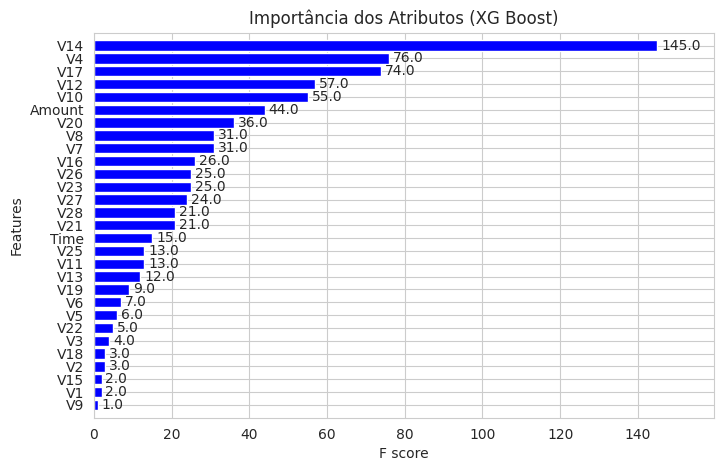

In [372]:
# plotando atributos importantes para XG Boost
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Importância dos Atributos (XG Boost)", ax=ax, color="blue")
plt.show();

Nesse caso usamos os conjuntos de dados de treinamento e validação. Usaremos o modelo treinado para prever o valor alvo do conjunto de teste.

In [373]:
preds = model.predict(dtest)

Vamos calcular a área sobre a curva **ROC** calculando **AUC**.

In [374]:
print(f"A pontuação AUC obtida com o modelo XGBoost de dados recentes (conjunto teste) foi de {roc_auc_score(test_df[target].values, preds):.4f}")

A pontuação AUC obtida com o modelo XGBoost de dados recentes (conjunto teste) foi de 0.9796


### 7.5 Light Gradient-Boosting Machine

Vamos continuar os testes com outro modelo de *boosting*, o *Light Gradient-Boosting Machine* (*Light GBM*), considerado por muitos o mais veloz e de melhor performance, sendo o principal concorrente do *XGBoost* e do *Cat Boost*.

O *Light GBM* usa uma técnica de amostragem chamada de GOSS (*Gradient-based One-Side Sampling*). Se o gradiente de uma determinada amostra é grande em algum sentido, essa amostra apresenta maior erro, tornando esses pontos importantes para encontrar o ponto de divisão ideal.

*Light GBM* também é bom com variáveis categóricas, usando tanto validação de treino como validação cruzada.

#### 7.5.1 Validação de Treino

Começamos definindo os parâmetros do modelo *Light GBM* de **validação de treino**. Usaremos esses parâmetros apenas para esse primeiro modelo.

In [375]:
# definindo parâmetros para Light GBM
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,          # deve ser menor que 2
          'max_depth': 4,           # valor "-1" significa sem limite
          'min_child_samples': 100, # número mínimo de dados necessários numa folha
          'max_bin': 100,           # número de compartimentos agrupados para valores
          'subsample': 0.9,         # proporção de amostra da instância de treinamento
          'subsample_freq': 1,      # frequência da subamostra, <=0 significa sem ativação
          'colsample_bytree': 0.7,  # proporção de subamostragem de colunas ao construir cada árvore
          'min_child_weight': 0,    # Soma mínima do peso da instância necessária em uma folha
          'min_split_gain': 0,      # lambda_l1, lambda_l2 and min_gain_to_split para regularização
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150,   # valor alto porque os dados de treinamento são desequilibrados
         }

Vamos preparar o modelo, criando as estruturas de dados do *dataset* a partir dos conjuntos de treinamento e validação.

In [376]:
# separando conjunto de dados de treinamento e validação para LightGBM
dtrain = lgb.Dataset(train_df[predictors].values,
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)

Executaremos o modelo usando a função **Train**.

In [377]:
# treinando o modelo LightGBM
callbacks = [lgb.log_evaluation()]
model = lgb.train(params,
                  dtrain,
                  valid_sets=[dtrain, dvalid],
                  valid_names=['train','valid'],
                  num_boost_round=MAX_ROUNDS2,
                  callbacks=callbacks,
                  feval=None)

[1]	train's auc: 0.969202	valid's auc: 0.941177
[2]	train's auc: 0.971746	valid's auc: 0.93617
[3]	train's auc: 0.984825	valid's auc: 0.948888
[4]	train's auc: 0.987366	valid's auc: 0.94772
[5]	train's auc: 0.989242	valid's auc: 0.948711
[6]	train's auc: 0.992724	valid's auc: 0.95029
[7]	train's auc: 0.992934	valid's auc: 0.948995
[8]	train's auc: 0.993184	valid's auc: 0.956376
[9]	train's auc: 0.993598	valid's auc: 0.956397
[10]	train's auc: 0.993856	valid's auc: 0.957083
[11]	train's auc: 0.99434	valid's auc: 0.956917
[12]	train's auc: 0.994465	valid's auc: 0.954389
[13]	train's auc: 0.994784	valid's auc: 0.954631
[14]	train's auc: 0.994933	valid's auc: 0.952153
[15]	train's auc: 0.99522	valid's auc: 0.95415
[16]	train's auc: 0.99532	valid's auc: 0.954636
[17]	train's auc: 0.995439	valid's auc: 0.955084
[18]	train's auc: 0.995525	valid's auc: 0.955096
[19]	train's auc: 0.995629	valid's auc: 0.955758
[20]	train's auc: 0.995724	valid's auc: 0.957062
[21]	train's auc: 0.995809	valid's a

A melhor pontuação **Light GBM** de validação de treino após 100 rodadas foi obtida na rodada **29**, para a qual **AUC** foi aproximadamente **0,9578**.

Vamos representar graficamente a importância da variável.

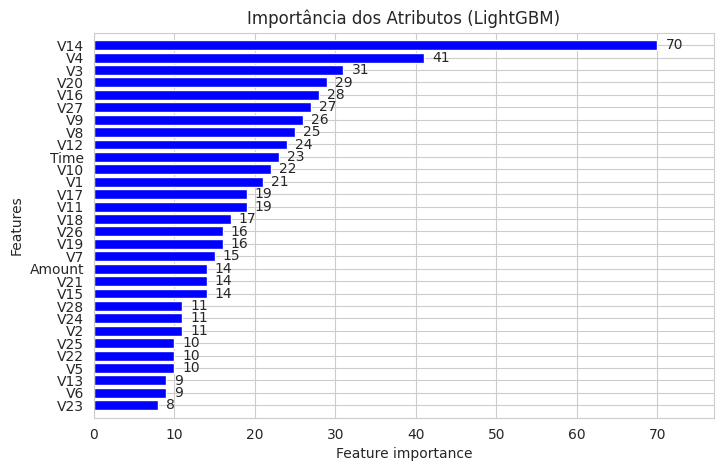

In [378]:
# plotando os atributos importantes para LightGBM
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Importância dos Atributos (LightGBM)", ax=ax,color="blue")
plt.show()

Vamos prever agora o valor *target* dos dados de **Teste_df**.

In [379]:
preds = model.predict(test_df[predictors])

Vamos calcular a pontuação **AUC** para a previsão.

In [380]:
print(f"A pontuação AUC obtida com o modelo Light GBM com validação de treino para o conjunto de teste foi de ({roc_auc_score(test_df[target].values, preds):.4f})")

A pontuação AUC obtida com o modelo Light GBM com validação de treino para o conjunto de teste foi de (0.9507)


A pontuação **AUC** obtida pelo **Light GBM** com validação de treino para o conjunto de teste foi de **0,9506**.

#### 7.5.2 Validação Cruzada

Vamos usar agora a **validação cruzada** para treinar e avaliar os modelos. Para tal usaremos validação cruzada **KFold**.

Os dados serão divididos em 5 partes (*folds*). Na primeira iteração a primeira parte será utilizada para teste e as partes restantes serão utilizadas para treinamento do modelo gerando uma métrica de avaliação. Na segunda iteração, a segunda parte será utilizada para teste enquanto as demais para treino.

Esse processo será repetido 5 vezes até que toda a base passe pelo processo de treino e teste, gerando uma métrica de avaliação média final para o modelo.

O valor de K (*NUMBER_KFOLDS*) é escolhido de forma que cada grupo de dados para treino e teste sejam grandes o suficiente para representarem estatisticamente o *dataset* original.

É possível encontrar na literatura a orientação para a utilização de K=5 ou K=10, valores encontrados através de experimentos, mas não é uma regra formal.

In [381]:
# definindo validação cruzada
kf = KFold(n_splits = "NUMBER_KFOLDS", random_state = RANDOM_STATE, shuffle = True)

# criando arrays e dataframes para armazenar resultados
oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()
n_fold = 0

for train_idx, valid_idx in kf.split(train_df):
    train_x, train_y = train_df[predictors].iloc[train_idx],train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[predictors].iloc[valid_idx],train_df[target].iloc[valid_idx]

    evals_results = {}
    # definindo parâmetros
    model =  LGBMClassifier(
                  nthread=-1,
                  n_estimators=2000,
                  learning_rate=0.01,
                  num_leaves=80,
                  colsample_bytree=0.98,
                  subsample=0.78,
                  reg_alpha=0.04,
                  reg_lambda=0.073,
                  subsample_for_bin=50,
                  boosting_type='gbdt',
                  is_unbalance=False,
                  min_split_gain=0.025,
                  min_child_weight=40,
                  min_child_samples=510,
                  objective='binary',
                  metric='auc',
                  silent=-1,
                  verbose=-1,
                  feval=None)

    # inicializando e ajustando o modelo
    model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric= 'auc')

    oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration=model.best_iteration_)[:, 1]
    test_preds += model.predict_proba(test_df[predictors], num_iteration=model.best_iteration_)[:, 1] / kf.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = predictors
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1

    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Parte%2d - AUC: %.4f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    del model, train_x, train_y, valid_x, valid_y
    gc.collect()
    n_fold = n_fold + 1
train_auc_score = roc_auc_score(train_df[target], oof_preds)

# print('A Pontuação AUC final é %.4f' % train_auc_score)

ValueError: The number of folds must be of Integral type. NUMBER_KFOLDS of type <class 'str'> was passed.

Vamos calcular a área sobre a curva **ROC** calculando **AUC**.

In [ ]:
print(f"A pontuação AUC final do modelo Light GBM com validação cruzada (KFolds={NUMBER_KFOLDS}) para a previsão dos dados do teste foi de {train_auc_score:.4f}")

### 7.6 Voting Classifier

Voting Classifier (Classificação por Votação) é um modelo essemble do tipo "voting". Essa abordagem consiste em combinar as previsões de dois ou mais  modelos independentes, chamados de classificadores base, para escolher uma predição final, feita por votação majoritária.

O ensemble Voting geralmente tem melhor acurácia que o melhor classificador individual do ensemble. E mesmo que todos os classificadores escolhidos para a votação tenham predições baixas, o ensemble voting ainda pode conseguir um bom resultado,  desde que os classificadores escolhidos sejam suficientemente numerosos e diversos.

## 8 Avaliação de Resultados
---

Iniciamos esse MVP investigando os dados do *dataset* obtido no site ***Kaglle***, verificando o seu desequilíbrio, visualizando seus recursos e entendendo melhor o relacionamento entre seus diferentes atributos.

Em seguida, observamos alguns modelos preditivos. Verificamos na prática que alguns algoritmos são mais lentos, e com outros obtemos resultados mais ágeis. Como algoritmos para classificação, usamos árvore de classificação em *Ramdon Forest, XGBoost, CatBoost e LightGBM*. Eles constroem árvores de decisão, e as otimizam para minimizar uma função de perda.

*XGBoost, CatBoost e LightGBM* oferecem vários hiperparâmetros, que podem ser ajustados para otimizar o desempenho do modelo. Os parâmetros comuns incluem taxa de aprendizagem, profundidade da árvore, número de árvores e termos de regularização.

Usamos como métricas de avaliação a matriz de confusão e a curva ROC. Como nossa pontuação AOC (indicador de desempenho) representa a área debaxio da curva ROC, na verdade o que estamos fazendo é - matematicamente - o **cálculo da integral** de uma função no intervalo desejado.

Nosso *dataset* foi dividido em 3 partes: um conjunto de treinamento, um conjunto de validação e um conjunto de teste. Para os primeiros modelos, usamos apenas os conjuntos de treinamento e teste.

Começamos com **RandomForrestClassifier**, para o qual obtivemos um valor AUC de **0,852** ao prever o alvo para o conjunto de teste.

Seguimos com o modelo **AdaBoostClassifier**, com pontuação AUC mais baixa (**0,833**) para previsão dos valores alvo do conjunto de teste.

Depois testamos o **CatBoostClassifier**. Com a pontuação AUC, após o treinamento de 500 iterações, obtivemos o resultdo um pouco melhor **0,857**.

Em seguida, experimentamos o modelo **XGBoost**. Neste caso, passou-se a usar o conjunto de validação do modelo de treinamento, o que representou um avanço. A melhor pontuação AUC de validação obtida foi **0,983**. Depois usamos o modelo com a melhor etapa de treinamento para prever o valor alvo a partir dos dados de teste, e a pontuação AUC obtida foi **0,979**.

A seguir apresentamos os nosso *dataset* ao modelo **LightGBM**. Usamos os métodos de **validação de treino** e a **validação cruzada** para avaliar a eficácia do modelo para prever o valor do atributo "*Class*", ou seja, detectar se uma transação era fraudulenta ou não.

Com o primeiro método (validação de treino) obtivemos valores de AUC em torno de **0,957**. Para o conjunto de testes, a pontuação obtida com validação foi **0,950**. Já com a validação cruzada, usando um valor de KFolds=5, obtivemos uma pontuação AUC para a predição do teste de **0,975**.

Depois de analisar todos esses modelos, a pergunta que fica é: *qual o melhor*?

Existem os mais populares, mas não temos como afirmar que um modelo específico será sempre o melhor.

Ao trabalharmos com *Machine Learning* e *Deep Learning* certamente iremos lidar com situações diferentes em ambientes diferentes. E para cada situação específica, um modelo de algoritmo pode apresentar melhores resultados do que o outro, ao lidar melhor com aprendizado supervisionado ou não, atributos com características categóricas ou de cardinalidade, disponibilidade maior ou menor de tempo e recursos computacionais, acurácia, *recall*, precisão, escalabilidade, etc.

Ainda há espaço para melhorias, como por exemplo experimentar variando os hiperparâmetros dos algoritmos, mas a conclusão que tiramos é que os modelos de aprendizado de máquina já desempenham - e cada vez mais desempenharão - um papel crucial na abordagem do problema abordado por esse MVP.

## 9 Referências
---

* Portal Terra: https://www.terra.com.br/noticias/perdas-por-fraudes-em-cartoes-de-credito-chegam-a-us-49-bi,d1e8a89c817007ab5d34cee533366a8febpdu8o3.html
* Credit Card Fraud Detection Database: https://www.kaggle.com/mlg-ulb/creditcardfraud
* Data School: https://www.dataschool.io/roc-curves-and-auc-explained/
* ROC-AUC: https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve
* RandomForrestClassifier: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* AdaBoostClassifier: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* CatBoostClassifier: https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_catboostclassifier-docpage/
* XGBoost API referência em Python: http://xgboost.readthedocs.io/en/latest/python/python_api.html
* LightGBM implementação em Python: https://github.com/Microsoft/LightGBM/tree/master/python-package
